In [ ]:
import pandas as pd

# Load the provided datasets
plaksha_metrics_path = '/content/Plaksha UG Metrics (1).xlsx'
insta_data_path = '/content/insta data (1) (2).xlsx'

# Reading the excel files
plaksha_metrics_df = pd.read_excel(plaksha_metrics_path, sheet_name='All Platform Analysis')
insta_data_df = pd.read_excel(insta_data_path)

# Displaying the first few rows of each dataframe to understand their structure
plaksha_metrics_df.head(), insta_data_df.head()

(                Duration Followers Growth Growth (%) Engagement Engagement%  \
 0  Plaksha UG - LinkedIn       NaN    NaN        NaN        NaN         NaN   
 1    2024-03-01 00:00:00       NaN    NaN        NaN        NaN         NaN   
 2    2024-02-01 00:00:00       NaN    NaN        NaN        NaN         NaN   
 3    2024-01-01 00:00:00       NaN    NaN        NaN        NaN         NaN   
 4    2023-12-01 00:00:00       NaN    NaN        NaN        NaN         NaN   
 
   No. of posts Top post (highest impressions)  
 0          NaN                            NaN  
 1          NaN                            NaN  
 2          NaN                            NaN  
 3          NaN                            NaN  
 4          NaN                            NaN  ,
      #  Alt                                            Caption  \
 0  1.0  NaN  Why join Plaksha? Because you study the most i...   
 1  2.0  NaN  #StudentsOfPlaksha Our students are so much mo...   
 2  3.0  NaN  #YearRev

In [ ]:
# Selecting the relevant columns for the new dataframe
relevant_columns = ['Caption', 'Hashtags', 'Mentions', 'Timestamp', 'Type',
                    'Comments CountcommentsCount', 'Likes CountlikesCount']

# Creating a new dataframe with the selected columns
insta_data_selected_df = insta_data_df[relevant_columns]

# Cleaning the selected columns
# Replacing missing values in textual columns with appropriate placeholders
insta_data_selected_df['Caption'].fillna('No Caption', inplace=True)
insta_data_selected_df['Hashtags'].fillna(insta_data_selected_df['Hashtags'].mode()[0])
insta_data_selected_df['Mentions'].fillna(insta_data_selected_df['Mentions'].mode()[0])
# insta_data_selected_df['Location NamelocationName'].fillna('Location Not Specified', inplace=True)

# Converting numeric columns to numeric types and filling missing values with median
numeric_columns = ['Comments CountcommentsCount', 'Likes CountlikesCount']
for col in numeric_columns:
    insta_data_selected_df[col] = pd.to_numeric(insta_data_selected_df[col], errors='coerce')
    median_value = insta_data_selected_df[col].median()
    insta_data_selected_df[col].fillna(median_value, inplace=True)


<ipython-input-57-304dc855fc30>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insta_data_selected_df['Caption'].fillna('No Caption', inplace=True)
<ipython-input-57-304dc855fc30>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insta_data_selected_df[col] = pd.to_numeric(insta_data_selected_df[col], errors='coerce')
<ipython-input-57-304dc855fc30>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [ ]:
# Ensure 'Timestamp' column is in datetime format
insta_data_selected_df['Timestamp'] = pd.to_datetime(insta_data_selected_df['Timestamp'], errors='coerce')

# Extract month and year from the 'Timestamp' column
insta_data_selected_df['month'] = insta_data_selected_df['Timestamp'].dt.month.fillna(0).astype(int).astype(str).str.zfill(2)
insta_data_selected_df['year'] = insta_data_selected_df['Timestamp'].dt.year.fillna(0).astype(int).astype(str)

# Create 'Key(M-Y)' column
insta_data_selected_df['Key(M-Y)'] = insta_data_selected_df['month'] + '-' + insta_data_selected_df['year']

# Displaying the DataFrame to verify the new column
print(insta_data_selected_df[['Timestamp', 'Key(M-Y)']].head())

            Timestamp Key(M-Y)
0 2022-11-22 15:17:32  11-2022
1 2023-05-05 10:30:00  05-2023
2 2023-01-03 15:50:33  01-2023
3 2023-10-10 16:34:37  10-2023
4 2023-10-04 19:06:20  10-2023


<ipython-input-58-84a011e29a4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insta_data_selected_df['Timestamp'] = pd.to_datetime(insta_data_selected_df['Timestamp'], errors='coerce')
<ipython-input-58-84a011e29a4b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insta_data_selected_df['month'] = insta_data_selected_df['Timestamp'].dt.month.fillna(0).astype(int).astype(str).str.zfill(2)
<ipython-input-58-84a011e29a4b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Follower data
follower_data = {
    "08-2023": 4965, "07-2023": 4995, "06-2023": 4883, "05-2023": 4728,
    "04-2023": 4521, "03-2023": 4374, "02-2023": 4158, "01-2023": 3985,
    "12-2022": 3856, "11-2022": 3658, "10-2022": 3520, "09-2022": 3330,
    "08-2022": 3314, "07-2022": 3245, "06-2022": 3219, "05-2022": 3160,
    "04-2022": 3083, "03-2022": 2849, "02-2022": 2396, "01-2022": 2086,
    "12-2021": 1980, "11-2021": 1907, "10-2021": 1771, "09-2021": 1763,
    "08-2021": 1727, "07-2021": 1717, "06-2021": 1389, "05-2021": 1238,
    "04-2021": 1133, "03-2021": 1040, "02-2021": 848
}

# Convert dictionary to DataFrame
follower_df = pd.DataFrame(list(follower_data.items()), columns=['Month-Year', 'Followers'])

# Splitting Month-Year into separate Month and Year columns and converting to numerical format
follower_df[['Month', 'Year']] = follower_df['Month-Year'].str.split('-', expand=True)
follower_df['Month'] = follower_df['Month'].astype(int)
follower_df['Year'] = follower_df['Year'].astype(int)

# Creating a column for linear regression (months since start)
start_date = pd.to_datetime('02-2021', format='%m-%Y')
follower_df['Date'] = pd.to_datetime(follower_df['Month-Year'], format='%m-%Y')
follower_df['Months_Since_Start'] = (follower_df['Date'] - start_date).dt.days // 30

# Preparing data for linear regression
X = follower_df[['Months_Since_Start']]
y = follower_df['Followers']

# Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate month-year combinations from 02-2021 to 12-2023
all_dates = pd.date_range(start='01-2020', end='12-2023', freq='MS')
all_month_years = all_dates.strftime('%m-%Y')

# Predict followers for each month-year combination
months_since_start = (all_dates - start_date).days // 30
predicted_followers = model.predict(np.array(months_since_start).reshape(-1, 1))

# Convert the predicted values to integers and ensure minimum value is 5
predicted_followers_int = [max(int(follower), 100) for follower in predicted_followers]

# Create dictionary of predictions
predicted_follower_data = dict(zip(all_month_years, predicted_followers_int))

# Print the predicted follower data
for key, value in predicted_follower_data.items():
    print(key, value)

01-2020 100
02-2020 100
03-2020 100
04-2020 100
05-2020 100
06-2020 100
07-2020 100
08-2020 100
09-2020 100
10-2020 168
11-2020 307
12-2020 446
01-2021 585
02-2021 862
03-2021 862
04-2021 1001
05-2021 1140
06-2021 1417
07-2021 1556
08-2021 1695
09-2021 1833
10-2021 1972
11-2021 2111
12-2021 2249
01-2022 2388
02-2022 2527
03-2022 2666
04-2022 2804
05-2022 2943
06-2022 3082
07-2022 3221
08-2022 3359
09-2022 3498
10-2022 3637
11-2022 3776
12-2022 3914
01-2023 4053
02-2023 4192
03-2023 4331
04-2023 4469
05-2023 4608
06-2023 4747
07-2023 4886
08-2023 5024
09-2023 5163
10-2023 5302
11-2023 5440
12-2023 5579


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Looping through each row in insta_data_selected_df to map 'followers'
for index, row in insta_data_selected_df.iterrows():
    key = row['Key(M-Y)']
    insta_data_selected_df.at[index, 'followers'] = predicted_follower_data.get(key, 0)

# Displaying the DataFrame to verify the new 'followers' column
print(insta_data_selected_df[['Timestamp', 'Key(M-Y)', 'followers']].head())

            Timestamp Key(M-Y)  followers
0 2022-11-22 15:17:32  11-2022     3776.0
1 2023-05-05 10:30:00  05-2023     4608.0
2 2023-01-03 15:50:33  01-2023     4053.0
3 2023-10-10 16:34:37  10-2023     5302.0
4 2023-10-04 19:06:20  10-2023     5302.0


<ipython-input-60-bd4a751c6946>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insta_data_selected_df.at[index, 'followers'] = predicted_follower_data.get(key, 0)


In [ ]:
# Fill any null values in 'followers' with 0 and convert the column to integer type
insta_data_selected_df['followers'].fillna(0, inplace=True)
insta_data_selected_df = insta_data_selected_df.astype({'followers': 'int'})

# Re-calculate the median value of 'followers' after filling nulls
median_fol_val = insta_data_selected_df['followers'].median()

# Replace 1 and 0 in 'followers' with the median value
insta_data_selected_df.loc[insta_data_selected_df['followers'].isin([1, 0]), 'followers'] = median_fol_val

# Displaying the DataFrame to verify the changes
print(insta_data_selected_df[['followers']].head())

   followers
0       3776
1       4608
2       4053
3       5302
4       5302


<ipython-input-61-09b3a20586ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insta_data_selected_df['followers'].fillna(0, inplace=True)


In [ ]:
# Replace null values in 'Likes Count' and 'Comments Count' with zeros
insta_data_selected_df['Likes CountlikesCount'] = pd.to_numeric(insta_data_selected_df['Likes CountlikesCount'], errors='coerce')
insta_data_selected_df['Comments CountcommentsCount'] = pd.to_numeric(insta_data_selected_df['Comments CountcommentsCount'], errors='coerce')
comment_median = insta_data_selected_df['Comments CountcommentsCount'].median()
like_median = insta_data_selected_df['Likes CountlikesCount'].median()
insta_data_selected_df['Likes CountlikesCount'] = insta_data_selected_df['Likes CountlikesCount'].fillna(like_median)
insta_data_selected_df['Comments CountcommentsCount'] = insta_data_selected_df['Comments CountcommentsCount'].fillna(comment_median)

# Convert 'followers' to numeric and replace null or zero values with the median
insta_data_selected_df['followers'] = pd.to_numeric(insta_data_selected_df['followers'], errors='coerce').fillna(0)
followers_median = insta_data_selected_df['followers'].median()
insta_data_selected_df['followers'].replace(0, followers_median, inplace=True)

# Calculate the engagement score
insta_data_selected_df['engagement_score'] = ((insta_data_selected_df['Likes CountlikesCount'] + insta_data_selected_df['Comments CountcommentsCount']) / insta_data_selected_df['followers']) * 100

insta_data_selected_df['Timestamp'] = pd.to_datetime(insta_data_selected_df['Timestamp'])
insta_data_selected_df['hour'] = insta_data_selected_df['Timestamp'].dt.hour
insta_data_selected_df['day'] = insta_data_selected_df['Timestamp'].dt.day_name()


insta_data_selected_df['Hashtags'] = insta_data_selected_df['Hashtags'].fillna(insta_data_selected_df['Hashtags'].mode()[0])
insta_data_selected_df['Mentions'] = insta_data_selected_df['Mentions'].fillna(insta_data_selected_df['Mentions'].mode()[0])

insta_data_selected_df['Hashtags'] = insta_data_selected_df['Hashtags'].str.split().str[0].astype(float)
insta_data_selected_df['Mentions'] = insta_data_selected_df['Mentions'].str.split().str[0].astype(float)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
insta_data_selected_df['day_encoded'] = label_encoder.fit_transform(insta_data_selected_df['day'])

# Explicitly set 'Monday' to be encoded as 0
mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
insta_data_selected_df['day_encoded'] = insta_data_selected_df['day'].map(mapping)

# Displaying the DataFrame to verify the 'engagement_score' column
print(insta_data_selected_df[['Timestamp', 'Likes CountlikesCount', 'Comments CountcommentsCount', 'followers', 'engagement_score','day','hour']].head())

            Timestamp  Likes CountlikesCount  Comments CountcommentsCount  \
0 2022-11-22 15:17:32                  184.0                         14.0   
1 2023-05-05 10:30:00                  162.0                          1.0   
2 2023-01-03 15:50:33                  170.0                          3.0   
3 2023-10-10 16:34:37                   50.0                          0.0   
4 2023-10-04 19:06:20                   72.0                          0.0   

   followers  engagement_score        day  hour  
0       3776          5.243644    Tuesday  15.0  
1       4608          3.537326     Friday  10.0  
2       4053          4.268443    Tuesday  15.0  
3       5302          0.943040    Tuesday  16.0  
4       5302          1.357978  Wednesday  19.0  


In [ ]:
# Calculate the IQR for 'Likes CountlikesCount'
Q1 = insta_data_selected_df['Likes CountlikesCount'].quantile(0.25)
Q3 = insta_data_selected_df['Likes CountlikesCount'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
insta_data_selected_df = insta_data_selected_df[(insta_data_selected_df['Likes CountlikesCount'] >= lower_bound) &
                                                (insta_data_selected_df['Likes CountlikesCount'] <= upper_bound)]

In [ ]:
insta_data_selected_df.columns

Index(['Caption', 'Hashtags', 'Mentions', 'Timestamp', 'Type',
       'Comments CountcommentsCount', 'Likes CountlikesCount', 'month', 'year',
       'Key(M-Y)', 'followers', 'engagement_score', 'hour', 'day',
       'day_encoded', 'Caption_Text', 'Hashtag_Text'],
      dtype='object')

In [ ]:
# from google.colab import drive
# drive.mount('drive')

# insta_data_selected_df.to_csv('/content/drive/My Drive/insta_data_7.csv', encoding='utf-8', index=False)

In [ ]:
# insta_data_selected_df.drop(['Location NamelocationName'], axis=1)

Range of 'engagement_score' before standardization: 51.97141223556318
Range of 'engagement_score' after standardization: 9.596532066433115


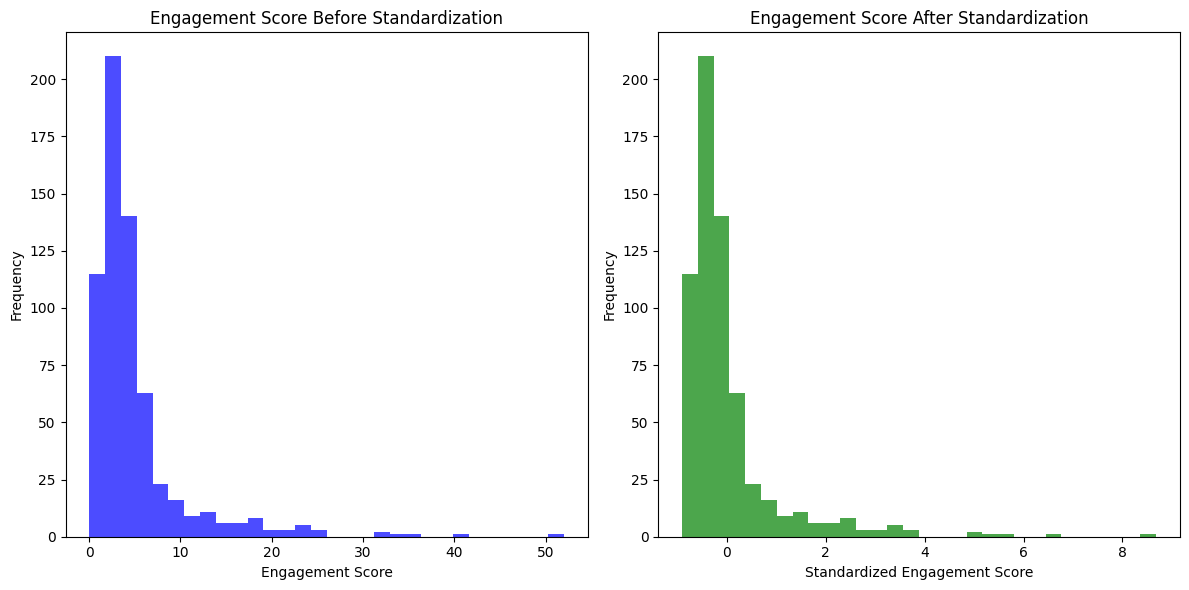

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df2 = insta_data_selected_df.copy()

# Extract the 'engagement_score' column
y = df2['engagement_score']

# Calculate the range of 'engagement_score' before standardization
range_before = np.max(y) - np.min(y)
print(f"Range of 'engagement_score' before standardization: {range_before}")

# Standardize the 'engagement_score' column
scaler = StandardScaler()
y_standardized = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Calculate the range of 'engagement_score' after standardization
range_standardized = np.max(y_standardized) - np.min(y_standardized)
print(f"Range of 'engagement_score' after standardization: {range_standardized}")

# Plotting 'engagement_score' before and after standardization
plt.figure(figsize=(12, 6))

# Before Standardization
plt.subplot(1, 2, 1)
plt.hist(y, bins=30, alpha=0.7, color='blue')
plt.title('Engagement Score Before Standardization')
plt.xlabel('Engagement Score')
plt.ylabel('Frequency')

# After Standardization
plt.subplot(1, 2, 2)
plt.hist(y_standardized, bins=30, alpha=0.7, color='green')
plt.title('Engagement Score After Standardization')
plt.xlabel('Standardized Engagement Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
insta_data_selected_df.columns

Index(['Caption', 'Hashtags', 'Mentions', 'Timestamp', 'Type',
       'Comments CountcommentsCount', 'Likes CountlikesCount', 'month', 'year',
       'Key(M-Y)', 'followers', 'engagement_score', 'hour', 'day',
       'day_encoded', 'Caption_Text', 'Hashtag_Text'],
      dtype='object')

In [ ]:
insta_data_selected_df.head()

,Caption,Hashtags,Mentions,Timestamp,Type,Comments CountcommentsCount,Likes CountlikesCount,month,year,Key(M-Y),followers,engagement_score,hour,day,day_encoded,Caption_Text,Hashtag_Text
0,Why join Plaksha? Because you study the most i...,18.0,0.0,2022-11-22 15:17:32,Video,14.0,184.0,11,2022,11-2022,3776,5.243644,15.0,Tuesday,1.0,Why join Plaksha? Because you study the most i...,"#Plaksha, #UniversityForTheFuture, #ReimagineT..."
1,#StudentsOfPlaksha Our students are so much mo...,15.0,0.0,2023-05-05 10:30:00,Video,1.0,162.0,05,2023,05-2023,4608,3.537326,10.0,Friday,4.0,StudentsOfPlaksha Our students are so much mor...,"#StudentsOfPlaksha, #Plaksha, #ReimagineTechEd..."
2,"#YearReview As we move into 2023, we want to p...",11.0,0.0,2023-01-03 15:50:33,Video,3.0,170.0,01,2023,01-2023,4053,4.268443,15.0,Tuesday,1.0,"YearReview As we move into 2023, we want to pa...","#YearReview, #Plaksha, #UniversityForTheFuture..."
3,"On #WorldMentalHealthDay, Dr. Shalini Sharma r...",5.0,0.0,2023-10-10 16:34:37,Video,0.0,50.0,10,2023,10-2023,5302,0.943040,16.0,Tuesday,1.0,On,"#WorldMentalHealthDay, #mentalhealthmatters, #..."
4,#ShapingBrightMinds #Plakshaexperience - where...,8.0,2.0,2023-10-04 19:06:20,Video,0.0,72.0,10,2023,10-2023,5302,1.357978,19.0,Wednesday,2.0,ShapingBrightMinds,"#ShapingBrightMinds, #Plakshaexperience, #Plak..."


In [ ]:
# Function to extract caption text and hashtags
import re
def extract_caption_and_hashtags(text):
    # Case 1: Strings that don't start with a hashtag
    if not text.startswith('#'):
        # Extract caption text
        caption_text_match = re.search(r'(.*?)(?:#|$)', text, re.DOTALL)
        caption_text = caption_text_match.group(1).strip() if caption_text_match else ""

        # Extract hashtags
        hashtags = re.findall(r'#\w+', text)

    # Case 2: Strings that start with a hashtag
    else:
        # Extract caption text (excluding the starting hashtag)
        caption_text_match = re.search(r'#(.*?)(?:#|$)', text, re.DOTALL)
        caption_text = caption_text_match.group(1).strip() if caption_text_match else ""

        # Extract hashtags (including the starting hashtag)
        hashtags = re.findall(r'#\w+', text)

    return caption_text, ', '.join(hashtags)

# Apply the function to the "Caption" column and create new columns
insta_data_selected_df[['Caption_Text', 'Hashtag_Text']] = insta_data_selected_df['Caption'].apply(extract_caption_and_hashtags).apply(pd.Series)

# Display the resulting DataFrame
print(insta_data_selected_df[['Caption_Text', 'Hashtag_Text']])

                                          Caption_Text  \
0    Why join Plaksha? Because you study the most i...   
1    StudentsOfPlaksha Our students are so much mor...   
2    YearReview As we move into 2023, we want to pa...   
3                                                   On   
4                                   ShapingBrightMinds   
..                                                 ...   
652  MEET OUR TEAM! "I have picked up a lot of new ...   
653  “When I came out of Canaan, I had three busine...   
654                                       Republic Day   
655  It was a delight to meet students and parents ...   
656  “People get better at problem solving, not by ...   

                                          Hashtag_Text  
0    #Plaksha, #UniversityForTheFuture, #ReimagineT...  
1    #StudentsOfPlaksha, #Plaksha, #ReimagineTechEd...  
2    #YearReview, #Plaksha, #UniversityForTheFuture...  
3    #WorldMentalHealthDay, #mentalhealthmatters, #...  
4    #ShapingBrigh

In [ ]:
insta_data_selected_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 627 entries, 0 to 656
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Caption                      627 non-null    object        
 1   Hashtags                     627 non-null    float64       
 2   Mentions                     627 non-null    float64       
 3   Timestamp                    620 non-null    datetime64[ns]
 4   Type                         620 non-null    object        
 5   Comments CountcommentsCount  627 non-null    float64       
 6   Likes CountlikesCount        627 non-null    float64       
 7   month                        627 non-null    object        
 8   year                         627 non-null    object        
 9   Key(M-Y)                     627 non-null    object        
 10  followers                    627 non-null    int64         
 11  engagement_score             627 non-null    

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Time of execution: 281.99362778663635
Engagement Score Model - RMSE: 3.636336096629537, MAE: 2.0997423789242173, R-squared: 0.6143574390542257


<ipython-input-85-ee902928c435>:80: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(results_df['Actual'], label='Actual', shade=True)
<ipython-input-85-ee902928c435>:81: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(results_df['Predicted'], label='Predicted', shade=True)


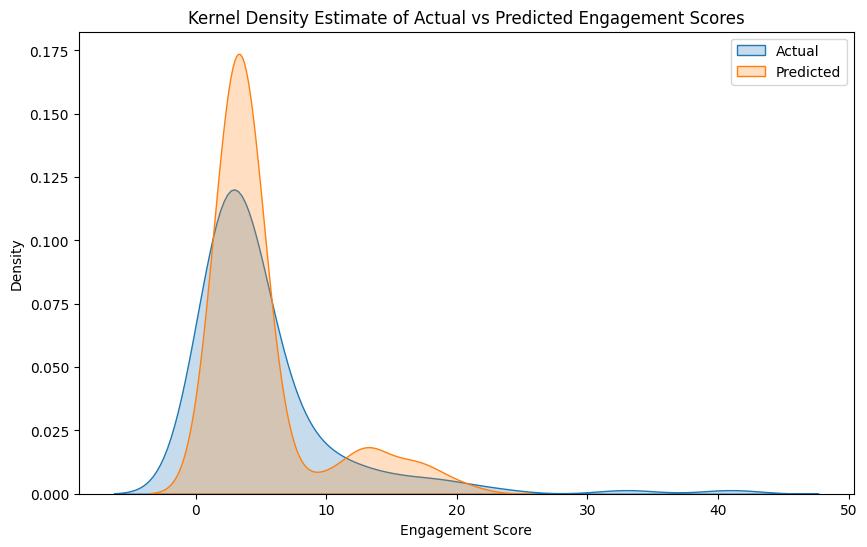

,Actual,Predicted,Difference
610,13.000000,18.138095,-5.138095
620,16.000000,16.592167,-0.592167
580,6.547619,10.695238,-4.147619
220,3.384042,3.186409,0.197633
513,3.248260,3.702734,-0.454474


In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming insta_data_selected_df is loaded and preprocessed
# Replace this with loading your DataFrame
# insta_data_selected_df = pd.read_csv('path_to_your_file.csv')

# Start timer
start = time.time()

# Separate the features and target variable
X = insta_data_selected_df[['Caption', 'Type', 'month', 'year', 'followers', 'Caption_Text', 'Hashtag_Text', 'day_encoded', 'hour','Hashtags','Mentions']]
y = insta_data_selected_df['engagement_score']

# TF-IDF Vectorization of text data
tfidf = TfidfVectorizer(max_features=1000)  # Limit number of features to avoid overfitting
X_tfidf = tfidf.fit_transform(X['Caption']).toarray()

numeric_columns = ['followers','day_encoded','hour','Hashtags','Mentions']

# Including other numeric features
numeric_features = X[numeric_columns].to_numpy()
X_combined = np.hstack((X_tfidf, numeric_features))

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
features = imputer.fit_transform(X_combined)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

# Create a machine learning pipeline
pipeline = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))

# Define a grid of parameters to search over
param_grid = {
    'randomforestregressor__n_estimators': [50, 100, 200],
    'randomforestregressor__max_depth': [None, 10, 20],
    'randomforestregressor__min_samples_split': [2, 5]
}

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_model.predict(X_test)

# End timer
end = time.time()
print("Time of execution:", (end - start))

# Calculate RMSE, MAE, and R-squared for the best model
rmse = sqrt(mean_squared_error(y_test, y_pred, squared=False))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Engagement Score Model - RMSE: {rmse}, MAE: {mae}, R-squared: {r2}")

# Creating a DataFrame with actual, predicted, and difference
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df['Difference'] = results_df['Actual'] - results_df['Predicted']

# Plotting a KDE plot for actual vs predicted values
plt.figure(figsize=(10, 6))
sns.kdeplot(results_df['Actual'], label='Actual', shade=True)
sns.kdeplot(results_df['Predicted'], label='Predicted', shade=True)
plt.title('Kernel Density Estimate of Actual vs Predicted Engagement Scores')
plt.xlabel('Engagement Score')
plt.ylabel('Density')
plt.legend()
plt.show()

results_df.head()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred, squared=False)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.636336096629537


In [116]:
sample = {
    "Caption" : ['Join our webinar on AI and Machine Learning this Friday! #AI #Webinar #MLPR'],
    "followers" : [5027],
    "day_encoded" : [6.0],
    "hour" : [13],
    "Hashtags" : [2],
    "Mentions" : [1]
}

sample_data = pd.DataFrame(sample)
sample_data

,Caption,followers,day_encoded,hour,Hashtags,Mentions
0,Join our webinar on AI and Machine Learning th...,5027,6.0,13,2,1


In [117]:
# Prepare the data in the same format as the training data
# TF-IDF Vectorization
sample_tfidf = tfidf.transform(sample_data['Caption']).toarray()

# Numeric features
numeric_features = sample_data[['followers', 'day_encoded', 'hour', 'Hashtags', 'Mentions']].to_numpy()

# Combine features
combined_sample = np.hstack((sample_tfidf, numeric_features))

# Impute missing values
features_imputed = imputer.transform(combined_sample)

# Standardize features
features_standardized = StandardScaler().fit_transform(features_imputed)

# Make prediction
predicted_score = best_model.predict(features_standardized)

print(f"Predicted Engagement Score: {predicted_score[0]}")

Predicted Engagement Score: 14.98366682177757


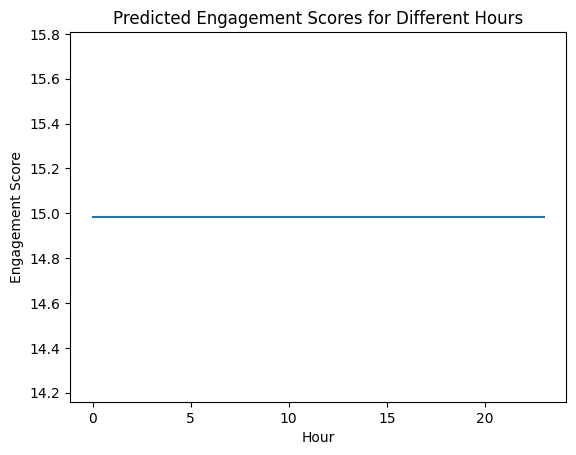

In [115]:
# prompt: make a plot and use different hours in a day, predict the engagement score and plot it

# Create a DataFrame with different hours in a day
hours = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
engagement_scores = []

# Iterate over each hour and predict the engagement score
for hour in hours:
    sample = {
        "Caption": ["Join our webinar on AI and Machine Learning this Friday! #AI #Learning #Webinar #MLPR"],
        "followers": [5027],
        "day_encoded": [1.0],
        "hour": [hour],
        "Hashtags": [4],
        "Mentions": [1]
    }

    sample_data = pd.DataFrame(sample)

    # Prepare the data in the same format as the training data
    # TF-IDF Vectorization
    sample_tfidf = tfidf.transform(sample_data['Caption']).toarray()

    # Numeric features
    numeric_features = sample_data[['followers', 'day_encoded', 'hour', 'Hashtags', 'Mentions']].to_numpy()

    # Combine features
    combined_sample = np.hstack((sample_tfidf, numeric_features))

    # Impute missing values
    features_imputed = imputer.transform(combined_sample)

    # Standardize features
    features_standardized = StandardScaler().fit_transform(features_imputed)

    # Make prediction
    predicted_score = best_model.predict(features_standardized)

    # Add the predicted engagement score to the list
    engagement_scores.append(predicted_score)

# Plot the engagement scores against the hours
plt.plot(hours, engagement_scores)
plt.xlabel("Hour")
plt.ylabel("Engagement Score")
plt.title("Predicted Engagement Scores for Different Hours")
plt.show()
